In [1]:
import numpy as np
import pandas as pd
#import pyreadr
from matplotlib import pyplot as plt
import seaborn as sns
import tabulate as tabulate
import csv
from IPython.display import display, HTML
plt.xkcd()

# Investment model A

In [2]:
lumpSum=200000
interestRate=0.05             # expected interest rate
#interestRate=0.1
chargesRate =0.015            # charges for maintaing the trust
#chargesRate =0.0

In [3]:
year=[]
trustLumpSum=[]
withdrawals=[]

In [4]:
yearsTillUni=7


In [5]:
year.append(0)
trustLumpSum.append(lumpSum)
withdrawals.append(0)
print("Balance of the account during saving phase:")
for _ in range(yearsTillUni):
    print("Current account balance after {} years is £{:.2f}".format(year[-1],trustLumpSum[-1]))
    newStatement=trustLumpSum[-1]*(1+(interestRate-chargesRate))
    year.append(year[-1]+1)
    trustLumpSum.append(newStatement)
    withdrawals.append(0)

Balance of the account during saving phase:
Current account balance after 0 years is £200000.00
Current account balance after 1 years is £207000.00
Current account balance after 2 years is £214245.00
Current account balance after 3 years is £221743.57
Current account balance after 4 years is £229504.60
Current account balance after 5 years is £237537.26
Current account balance after 6 years is £245851.07


In [6]:
yearsUniStudy=5
fixedWithdrawal=lumpSum*0.05
print("Balance of the account during university years with fixed yearly withdrawal of £{}".format(fixedWithdrawal))

Balance of the account during university years with fixed yearly withdrawal of £10000.0


In [7]:
for _ in range(yearsUniStudy):
    print("Current account balance after {} years is £{:.2f}, withdrawal at the end of year is £{}".format(year[-1],\
           trustLumpSum[-1],fixedWithdrawal))
    newStatement=(trustLumpSum[-1]-fixedWithdrawal)*(1+(interestRate-chargesRate))
    year.append(year[-1]+1)
    trustLumpSum.append(newStatement)
    withdrawals.append(fixedWithdrawal)

Current account balance after 7 years is £254455.85, withdrawal at the end of year is £10000.0
Current account balance after 8 years is £253011.81, withdrawal at the end of year is £10000.0
Current account balance after 9 years is £251517.22, withdrawal at the end of year is £10000.0
Current account balance after 10 years is £249970.32, withdrawal at the end of year is £10000.0
Current account balance after 11 years is £248369.28, withdrawal at the end of year is £10000.0


In [8]:
print("Final balance after last withdrawal is £{:.2f}".format(trustLumpSum[-2]-fixedWithdrawal))

Final balance after last withdrawal is £238369.28


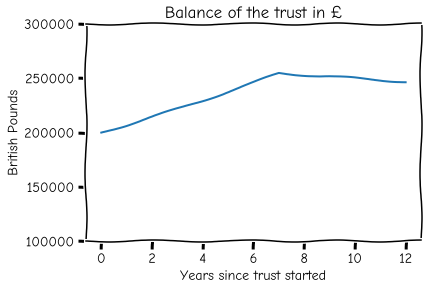

In [9]:
plt.plot(year,trustLumpSum)
plt.title("Balance of the trust in £")
plt.ylim([100000,300000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()

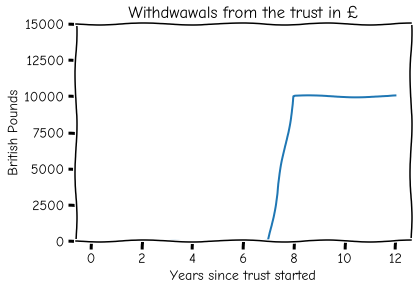

In [10]:
plt.plot(year,withdrawals)
plt.title("Withdwawals from the trust in £")
plt.ylim([0,15000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()

# Investment model B

In [11]:
lumpSum=200000
interestRate=0.05             # expected interest rate
#interestRate=0.1
chargesRate =0.015            # charges for maintaing the trust
#chargesRate =0.0
year=[]
trustLumpSum=[]
withdrawals=[]

In [12]:
interestRate=0.05             # expected interest rate
freeChargesRate=0.007         # charges without limit
restrictedChargesRate=0.0014
restrictedCeiling=375

In [13]:
taxRate=0.45                  # tax on capital gains
taxEscape=2000                # tax escape on capital gains

In [14]:
yearsTillUni=7
yearsUniStudy=5
year.append(0)
trustLumpSum.append(lumpSum)
withdrawals.append(0)
fixedWithdrawal=lumpSum*0.05

In [15]:
print("Balance of the account during saving phase:")      # Now more sophisticated calculation
for iYear in range(yearsTillUni+yearsUniStudy):
    accountBalance=trustLumpSum[-1]
    print("Current account balance after {} years is £{:.2f}".format(year[-1],accountBalance))
    if not iYear < yearsTillUni:
        print("Withdrawing £{} at the end of the year".format(fixedWithdrawal))
        accountBalance -= fixedWithdrawal
        
    interestGain=accountBalance*interestRate
    freeInterestCharge=accountBalance*freeChargesRate
    restrictedInterestCharge=accountBalance*restrictedChargesRate
    if restrictedInterestCharge > restrictedCeiling:
        restrictedInterestCharge=restrictedCeiling
    totalGain = interestGain-freeInterestCharge-restrictedInterestCharge    
    print("Interest Gain=£{:.2f} Free Interest Charge=£{:.2f} restricted Interest Charge=£{:.2f}, Total Gain={:.2f}"
          .format(interestGain,freeInterestCharge,restrictedInterestCharge,totalGain))
    
    taxDeduction = totalGain - taxEscape
    if taxDeduction > 0:
        taxDeduction = taxDeduction * taxRate
    else:
        taxDeduction = 0
        
    totalGain=totalGain-taxDeduction
    print("Tax deduction=£{:.2f} Gain after taxation=£{:.2f}".format(taxDeduction,totalGain))
          
    newStatement=accountBalance+totalGain

    year.append(year[-1]+1)
    trustLumpSum.append(newStatement)
    withdrawals.append(0)

Balance of the account during saving phase:
Current account balance after 0 years is £200000.00
Interest Gain=£10000.00 Free Interest Charge=£1400.00 restricted Interest Charge=£280.00, Total Gain=8320.00
Tax deduction=£2844.00 Gain after taxation=£5476.00
Current account balance after 1 years is £205476.00
Interest Gain=£10273.80 Free Interest Charge=£1438.33 restricted Interest Charge=£287.67, Total Gain=8547.80
Tax deduction=£2946.51 Gain after taxation=£5601.29
Current account balance after 2 years is £211077.29
Interest Gain=£10553.86 Free Interest Charge=£1477.54 restricted Interest Charge=£295.51, Total Gain=8780.82
Tax deduction=£3051.37 Gain after taxation=£5729.45
Current account balance after 3 years is £216806.74
Interest Gain=£10840.34 Free Interest Charge=£1517.65 restricted Interest Charge=£303.53, Total Gain=9019.16
Tax deduction=£3158.62 Gain after taxation=£5860.54
Current account balance after 4 years is £222667.28
Interest Gain=£11133.36 Free Interest Charge=£1558.6

In [16]:
print("Final balance after last withdrawal is £{:.2f}".format(trustLumpSum[-2]-fixedWithdrawal))

Final balance after last withdrawal is £215281.40


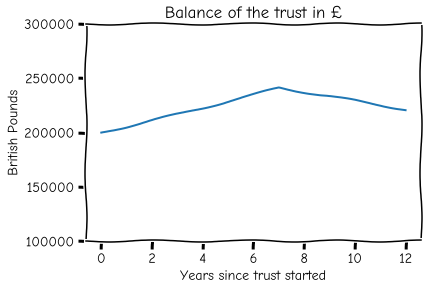

In [17]:
plt.plot(year,trustLumpSum)
plt.title("Balance of the trust in £")
plt.ylim([100000,300000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()